# NLPipe - Demo (simple)
<p>#TODO: Needs description of what this file is</p>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/mvmagni/magritte/blob/main/demo_colab/NLPipe_demo_simple_colab.ipynb)

In [ ]:
# Remove existing magritte repo if present
!rm -rf magritte

# Clone repo for utilities
!git clone https://github.com/mvmagni/magritte

In [ ]:
# Install and import required packages for data.
!pip install -r magritte/requirements.txt --quiet

# Install any requirements specific to the demo
!pip install -r magritte/demo_colab/requirements_demo.txt --quiet


from cleantext import clean

# Initialize environment

In [1]:
import sys
import os

PROJECT_DIR = f'{os.getcwd()}'
DEMO_DATA_DIR = f'{PROJECT_DIR}/magritte/data'
DEMO_DATA_FILE = f'{DEMO_DATA_DIR}/IMDB Dataset.csv.gz'
UTILITIES_DIR = f'{PROJECT_DIR}/magritte/utilities'

# Add the UTILITY_DIR to the path to import files
sys.path.append(UTILITIES_DIR)

In [2]:
import pandas as pd
import numpy as np

# Load Data
<p>Loading the IMDB Dataset<br>
50,000 records on pos/neg sentiment analysis<br>
25,000 records per class<br>

In [3]:
# Loading the IMDB Dataset
ORIG_DF = pd.read_csv(DEMO_DATA_FILE, compression='gzip')

# Changing target column from string to 0,1. Label encoding not yet included in framework
ORIG_DF['sentiment'] = np.where(ORIG_DF['sentiment']=='positive', 1, 0)

print(f'Data shape: {ORIG_DF.shape}')
display(ORIG_DF.head())

Data shape: (50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [4]:
# Setting up variables for later usage in DataPackage
DATA_COLUMN = 'review'
TARGET_COLUMN = 'sentiment'
UNIQUE_COLUMN = None   # Unique index column. If None, one will be created

# DataPackageParams
<p>#TODO: Needs description of what DataPackageParams is</p>

In [5]:
# DataPackageParams are optional. Can do it manually or store and save the params for re-run
from DataPackage import DataPackageParams
myDPP = DataPackageParams(
                    process_params=False, # True=run all data cleanup/setup on load
                    
                    # Class Balance
                    sample_size = None, # Can be set to an absolute value. None means undersample to smallest
                                        
                    # Text Cleaning Params
                    fix_unicode=True,  # fix various unicode errors
                    to_ascii=True,  # transliterate to closest ASCII representation
                    lower=True,  # lowercase text
                    no_line_breaks=False,  # fully strip line breaks as opposed to only normalizing them
                    no_urls=False,  # replace all URLs with a special token
                    no_emails=False,  # replace all email addresses with a special token
                    no_phone_numbers=False,  # replace all phone numbers with a special token
                    no_numbers=True,  # replace all numbers with a special token
                    no_digits=False,  # replace all digits with a special token
                    no_currency_symbols=False,  # replace all currency symbols with a special token
                    no_punct=False,  # remove punctuations
                    replace_with_punct="",  # instead of removing punctuations you may replace them
                    replace_with_url="<URL>",
                    replace_with_email="<EMAIL>",
                    replace_with_phone_number="<PHONE>",
                    replace_with_number="",
                    replace_with_digit="0",
                    replace_with_currency_symbol="<CUR>",
                    lang="en",  # set to 'de' for German special handling

                    # Remove stopwords
                    remove_stopwords=True, # Removes stopwords
                    stopword_language='english',
        
                    # train test split params
                    stratifyColumn=None, # If None will be autoset to target_column in DataPackage
                    train_size=0.8, # Can be percent or absolute number
                    random_state=765,
                    shuffle=True,

                    # Encoding params
                    encoding_type='TFIDF', # Currently only supports TFIDF encoding, TBA: BERT, GLOVE, Word2Vec
                    max_features=100 # Currently only used in TFIDF
                    )

# Data Package
<p>#TODO: Needs description of what this file is</p>

In [6]:
# Create the DataPackage
from DataPackage import DataPackage
myDP = DataPackage(original_data = ORIG_DF,
                   data_column = DATA_COLUMN,
                   target_column = TARGET_COLUMN,
                   unique_column = UNIQUE_COLUMN,
                   data_package_params = myDPP)

# Experiment Manager

In [7]:
from ExperimentManager import ExperimentManager

In [8]:
# Create the classifier used for the first Experiment
from xgboost import XGBClassifier
untrained_model_1 = XGBClassifier(eval_metric='mlogloss', 
                            tree_method='gpu_hist',
                            use_label_encoder=False,
                            max_depth=5,
                            n_estimators=100)

In [9]:
# Create the Experiment Manager 
myEM = ExperimentManager(project_name='Magritte',
                         experiment_name='XGB depth:5 est:100',
                         experiment_method='supervised',
                         untrained_model=untrained_model_1,
                         data_package=myDP)

                         

DataPackage summary
Attributes:
---> uniqueColumn: uuid
---> dataColumn: review
---> targetColumn: sentiment
Data:
---> isOrigDataLoaded: True
---> isWorkingDataLoaded: True
---> isCleanDataLoaded: False
---> isTrainDataLoaded: False
---> isTestDataLoaded: False

Original Data:
---> original data shape: (50000, 3)
Cleaned Data:
---> clean data shape: "N/A"
Working Data:
---> working data shape: (50000, 3)

Process:
---> isProcessed: False
---> isCleaned: False
---> isStopWorded: False
---> isBalanced: False
---> isEncoded: False
---> isTrainTestSplit: False

DataExperiment summary:
---> projectName: Magritte
---> experimentName: XGB depth:5 est:100
---> experimentMethod: supervised
---> isDataPackageLoaded: True
---> isProcessed: False
---> isModelLoaded: False
---> isModelPredicted: False
---> isLearningCurveCreated: False
---> isUntrainedModelLoaded: True
XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
 

In [10]:
# Add another experiment
from sklearn.ensemble import RandomForestClassifier

untrained_model_2 = RandomForestClassifier(n_jobs=-1,
                                     max_depth=10,
                                     n_estimators=10)

myEM.add_experiment(experiment_name='RF depth:10 est:10',
                    experiment_method='supervised',
                    untrained_model=untrained_model_2)


DataExperiment summary:
---> projectName: Magritte
---> experimentName: RF depth:10 est:10
---> experimentMethod: supervised
---> isDataPackageLoaded: True
---> isProcessed: False
---> isModelLoaded: False
---> isModelPredicted: False
---> isLearningCurveCreated: False
---> isUntrainedModelLoaded: True
RandomForestClassifier(max_depth=10, n_estimators=10, n_jobs=-1)



In [11]:
# Add another experiment
untrained_model_3 = XGBClassifier(eval_metric='mlogloss', 
                           tree_method='gpu_hist',
                           use_label_encoder=False,
                           max_depth=2,
                           n_estimators=20)

myEM.add_experiment(experiment_name='XGB depth:2 est:20',
                    experiment_method='supervised',
                    untrained_model=untrained_model_3)


DataExperiment summary:
---> projectName: Magritte
---> experimentName: XGB depth:2 est:20
---> experimentMethod: supervised
---> isDataPackageLoaded: True
---> isProcessed: False
---> isModelLoaded: False
---> isModelPredicted: False
---> isLearningCurveCreated: False
---> isUntrainedModelLoaded: True
XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, eval_metric='mlogloss', gamma=None,
              gpu_id=None, importance_type=None, interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=2,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=20, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method='gpu_hist', use_label_encoder=False,


In [12]:
from sklearn.cluster import KMeans
untrained_model_4 = KMeans(n_clusters=2, random_state=765)
myEM.add_experiment(experiment_name='KMeans n=2',
                    experiment_method='unsupervised',
                    untrained_model=untrained_model_4)


DataExperiment summary:
---> projectName: Magritte
---> experimentName: KMeans n=2
---> experimentMethod: unsupervised
---> Unsupervised experiment with target column sentiment
---> ---> prediction has been mapped: False
---> isDataPackageLoaded: True
---> isProcessed: False
---> isModelLoaded: False
---> isModelPredicted: False
---> isLearningCurveCreated: False
---> isUntrainedModelLoaded: True
KMeans(n_clusters=2, random_state=765)



# ExperimentManager - run_experiment

In [13]:
myEM.list_experiments()

idx Processed Method      Experiment name
  0     False   supervised XGB depth:5 est:100
  1     False   supervised RF depth:10 est:10
  2     False   supervised XGB depth:2 est:20
  3     False unsupervised KMeans n=2


Data package has not been processed. Processing now.
---------------------------------------------------------------------------
DataPackage summary
Attributes:
---> uniqueColumn: uuid
---> dataColumn: review
---> targetColumn: sentiment
Data:
---> isOrigDataLoaded: True
---> isWorkingDataLoaded: True
---> isCleanDataLoaded: False
---> isTrainDataLoaded: False
---> isTestDataLoaded: False

Original Data:
---> original data shape: (50000, 3)
Cleaned Data:
---> clean data shape: "N/A"
Working Data:
---> working data shape: (50000, 3)

Process:
---> isProcessed: False
---> isCleaned: False
---> isStopWorded: False
---> isBalanced: False
---> isEncoded: False
---> isTrainTestSplit: False
Processing data package with provided parameters


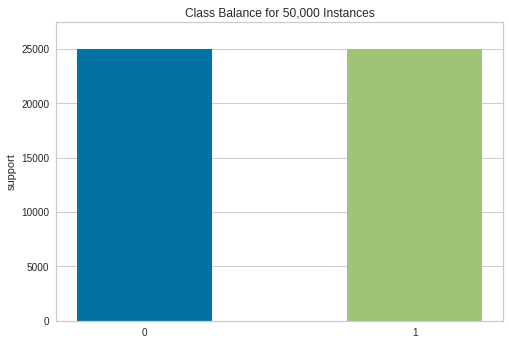

Undersampling data to match min class: 0 of size: 25000


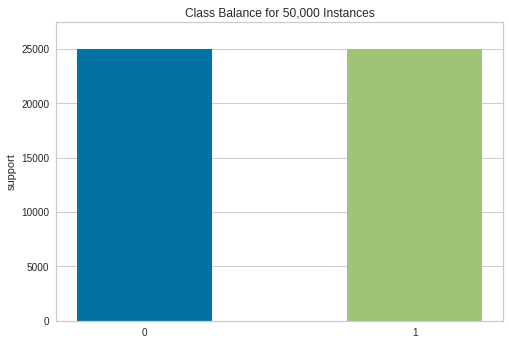

,sentiment,ttlCol
0,0,25000
1,1,25000


Cleaning text column...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50000/50000 [00:20<00:00, 2455.33it/s]
[nltk_data] Downloading package stopwords to /home/magni/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Removing stopwords...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50000/50000 [00:09<00:00, 5475.16it/s]



Encoding to TF-IDF with max_features=100
Encoding completed. Feature list:
['acting', 'actors', 'actually', 'all', 'also', 'and', 'another', 'around', 'back', 'bad', 'best', 'better', 'big', 'br', 'can', 'cast', 'character', 'characters', 'could', 'director', 'end', 'even', 'ever', 'every', 'film', 'films', 'find', 'first', 'funny', 'get', 'go', 'going', 'good', 'got', 'great', 'he', 'horror', 'however', 'in', 'it', 'know', 'life', 'like', 'little', 'look', 'lot', 'love', 'made', 'make', 'makes', 'man', 'many', 'movie', 'movies', 'much', 'never', 'new', 'nothing', 'old', 'one', 'part', 'people', 'plot', 'pretty', 'quite', 'real', 'really', 'say', 'scene', 'scenes', 'see', 'seems', 'seen', 'show', 'something', 'still', 'story', 'take', 'that', 'the', 'there', 'thing', 'things', 'think', 'this', 'though', 'time', 'two', 'us', 've', 'want', 'watch', 'watching', 'way', 'well', 'work', 'world', 'would', 'years', 'young']

Completed train/test split (train_size = 0.8):
---> Original data si

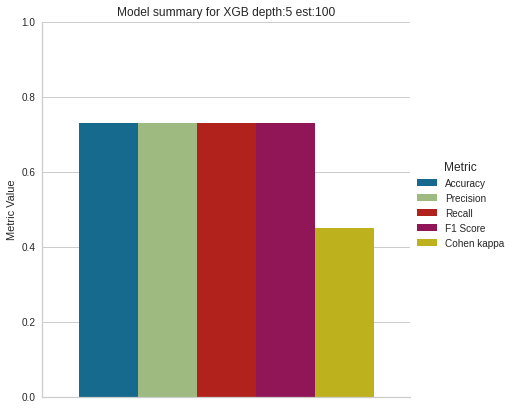

            Experiment  Accuracy  Precision  Recall  F1 Score  Cohen kappa
0  XGB depth:5 est:100      0.73       0.73    0.73      0.73         0.45


Completed. Wall time[h:m:s]: 00:00:00


---------------------------------------------------------------------------
Processing experiment: [1] RF depth:10 est:10

Training model for RF depth:10 est:10. Completed. Wall time[h:m:s]: 00:00:00
Predicting model for RF depth:10 est:10. Completed. Wall time[h:m:s]: 00:00:00

Model Stats:


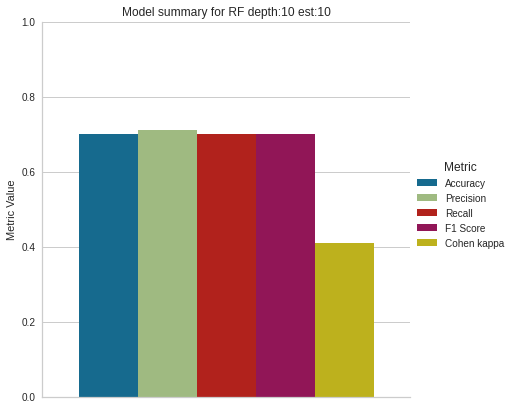

           Experiment  Accuracy  Precision  Recall  F1 Score  Cohen kappa
0  RF depth:10 est:10       0.7       0.71     0.7       0.7         0.41


Completed. Wall time[h:m:s]: 00:00:00


---------------------------------------------------------------------------
Processing experiment: [2] XGB depth:2 est:20

Training model for XGB depth:2 est:20. Completed. Wall time[h:m:s]: 00:00:00
Predicting model for XGB depth:2 est:20. Completed. Wall time[h:m:s]: 00:00:00

Model Stats:


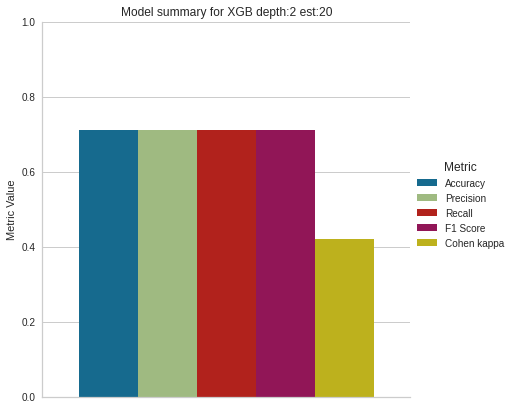

           Experiment  Accuracy  Precision  Recall  F1 Score  Cohen kappa
0  XGB depth:2 est:20      0.71       0.71    0.71      0.71         0.42


Completed. Wall time[h:m:s]: 00:00:00


---------------------------------------------------------------------------
Processing experiment: [3] KMeans n=2

Training model for KMeans n=2. Completed. Wall time[h:m:s]: 00:00:01
Predicting model for KMeans n=2. Completed. Wall time[h:m:s]: 00:00:00

Model Stats:


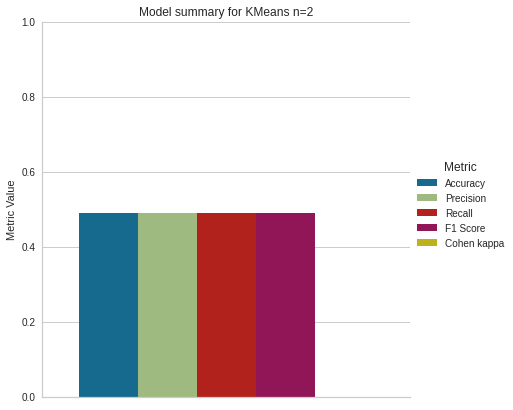

   Experiment  Accuracy  Precision  Recall  F1 Score  Cohen kappa
0  KMeans n=2      0.49       0.49    0.49      0.49        -0.02


Completed. Wall time[h:m:s]: 00:00:01


Processing complete. Displaying model comparison


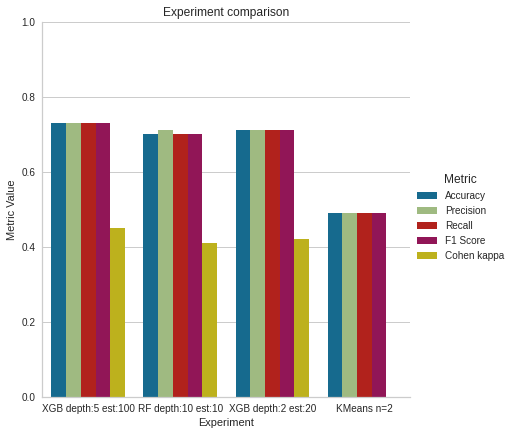

            Experiment  Accuracy  Precision  Recall  F1 Score  Cohen kappa
0  XGB depth:5 est:100      0.73       0.73    0.73      0.73         0.45
1   RF depth:10 est:10      0.70       0.71    0.70      0.70         0.41
2   XGB depth:2 est:20      0.71       0.71    0.71      0.71         0.42
3           KMeans n=2      0.49       0.49    0.49      0.49        -0.02

Processing experiments complete. Wall time[h:m:s]: 00:00:35


In [14]:
axis_labels = [0,1] #This won't be needed once the label encoder has been included
myEM.run_experiment(index=None) # index=None means process all experiements, 
                                # otherwise provide index of single experiment to run

In [31]:
_ = myEM.experiments[3].get_unsupervised_mapping(showNumResults=5,
                                                 auto_mapping=False)


Current results of comparison between clusters and actuals
   y_test  y_pred  record_count
0       1       0          2708
1       0       0          2625
2       0       1          2375
3       1       1          2292
Unique values in y_test: 2
Unique values in y_pred: 2
Unique values in y_test and y_pred: 2
Number of rows/combinations: 4

All mappings appear in predictions. All good
Display automapped prediction to actual results (no data changed)
{0: 1, 1: 0}


In [32]:
_ = myEM.experiments[3].get_unsupervised_mapping(showNumResults=5,
                                                 auto_mapping=True)


Current results of comparison between clusters and actuals
   y_test  y_pred  record_count
0       1       0          2708
1       0       0          2625
2       0       1          2375
3       1       1          2292
Unique values in y_test: 2
Unique values in y_pred: 2
Unique values in y_test and y_pred: 2
Number of rows/combinations: 4

All mappings appear in predictions. All good
Auto mapping the results
Mapping predicted to actual: {0: 1, 1: 0}


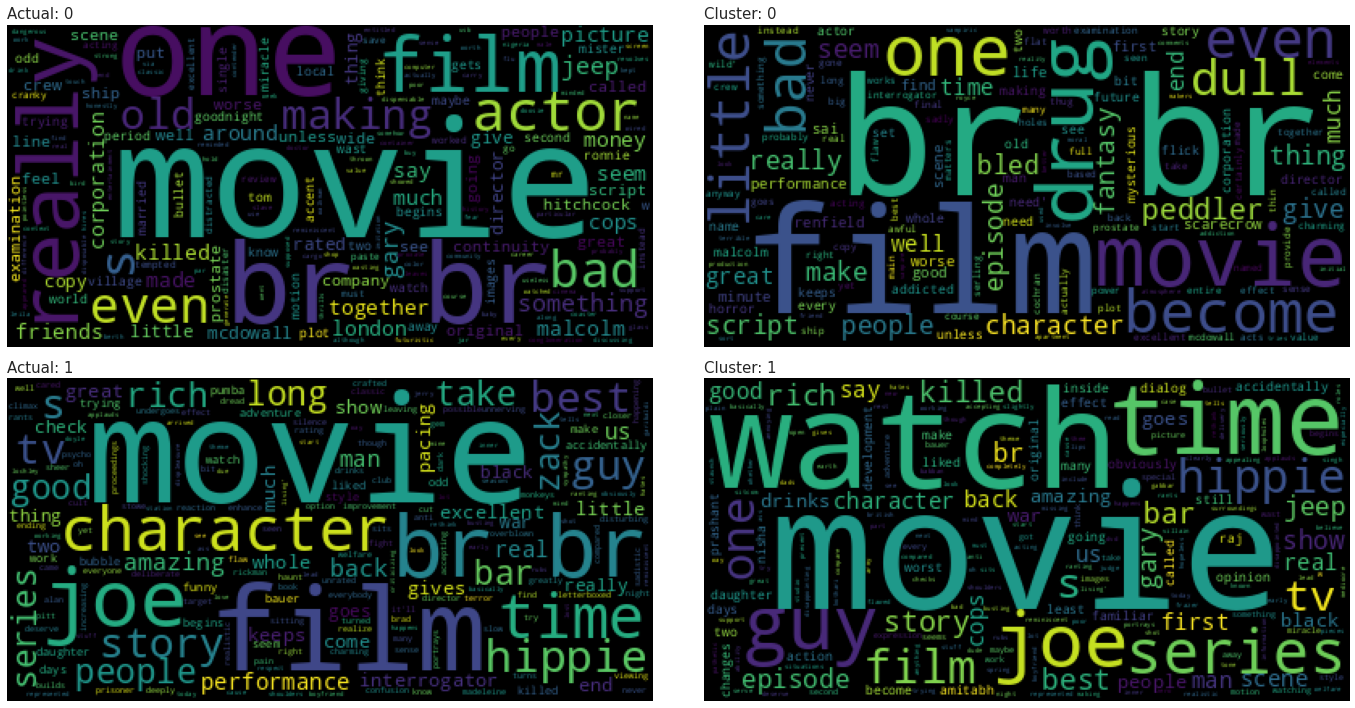

In [33]:
myEM.experiments[3].show_cluster_mapping_cloud()

Processing complete. Displaying model comparison


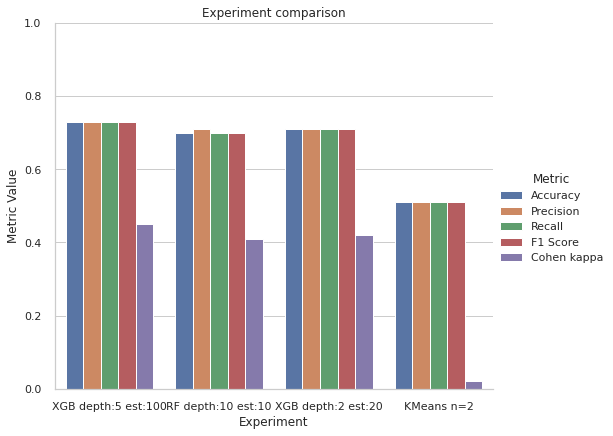

            Experiment  Accuracy  Precision  Recall  F1 Score  Cohen kappa
0  XGB depth:5 est:100      0.73       0.73    0.73      0.73         0.45
1   RF depth:10 est:10      0.70       0.71    0.70      0.70         0.41
2   XGB depth:2 est:20      0.71       0.71    0.71      0.71         0.42
3           KMeans n=2      0.51       0.51    0.51      0.51         0.02


In [42]:
_ = myEM.show_model_comparison()

# Experiment Summary


Model Stats:


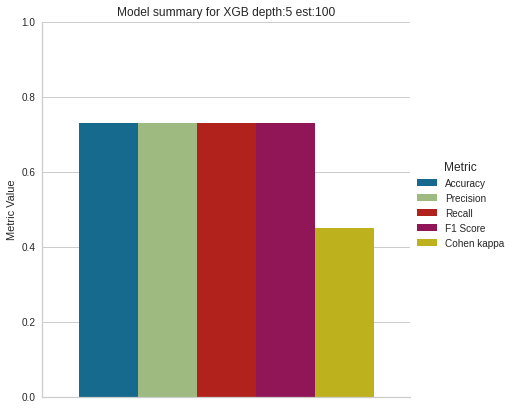

            Experiment  Accuracy  Precision  Recall  F1 Score  Cohen kappa
0  XGB depth:5 est:100      0.73       0.73    0.73      0.73         0.45



In [16]:
myEM.experiments[0].showModelStats()

              precision    recall  f1-score   support

           0       0.73      0.72      0.72      5000
           1       0.72      0.74      0.73      5000

    accuracy                           0.73     10000
   macro avg       0.73      0.73      0.73     10000
weighted avg       0.73      0.73      0.73     10000



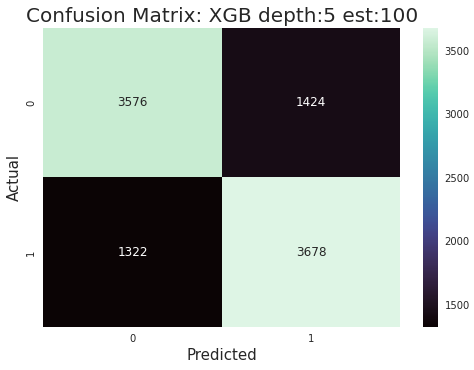

<Figure size 576x576 with 0 Axes>

In [17]:
myEM.experiments[0].showModelReport(axis_labels=axis_labels)

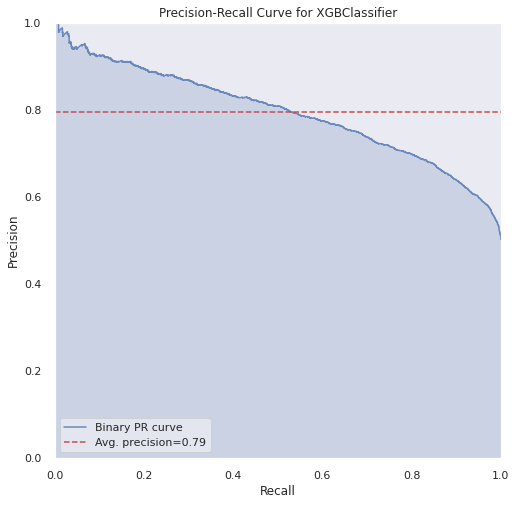

<Figure size 576x576 with 0 Axes>

In [18]:
myEM.experiments[0].showPrecisionRecallCurve()

'Model Learning curve has not yet been calculated. Calculating now'

<Figure size 576x576 with 0 Axes>

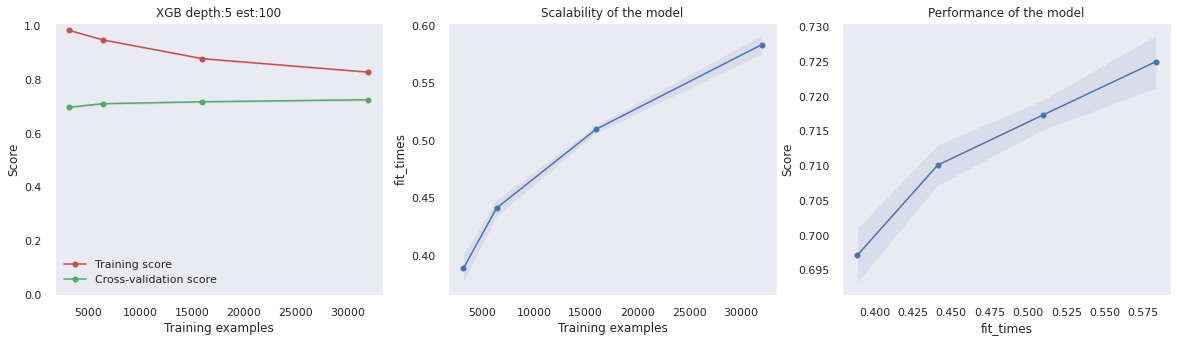

<Figure size 576x576 with 0 Axes>

In [19]:
myEM.experiments[0].showModelLearningCurve()

Model ROCAUC not calculated. Starting now


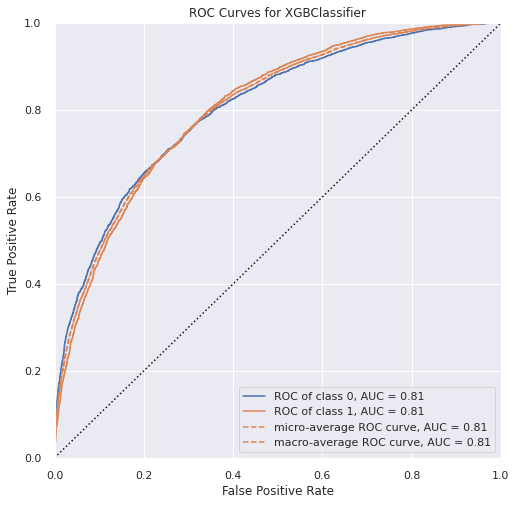

In [20]:
myEM.experiments[0].showModelROCAUC(axis_labels=axis_labels)

  0%|          | 0/101 [00:00<?, ?it/s]

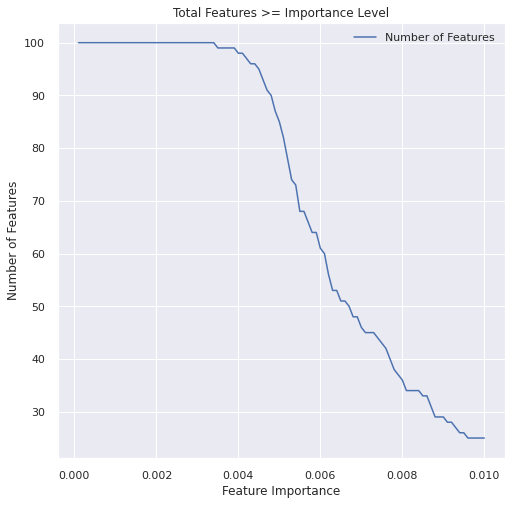

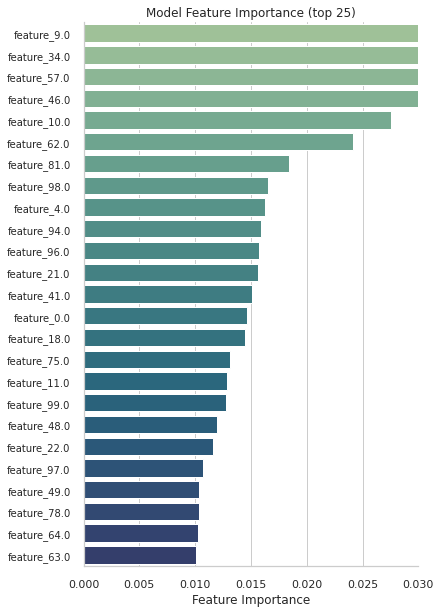

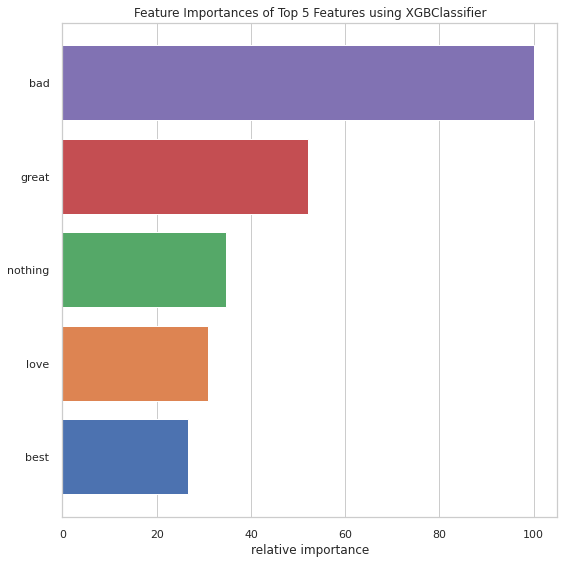

<Figure size 576x576 with 0 Axes>

In [21]:
myEM.experiments[0].showModelFeatureImportance()

# LIME

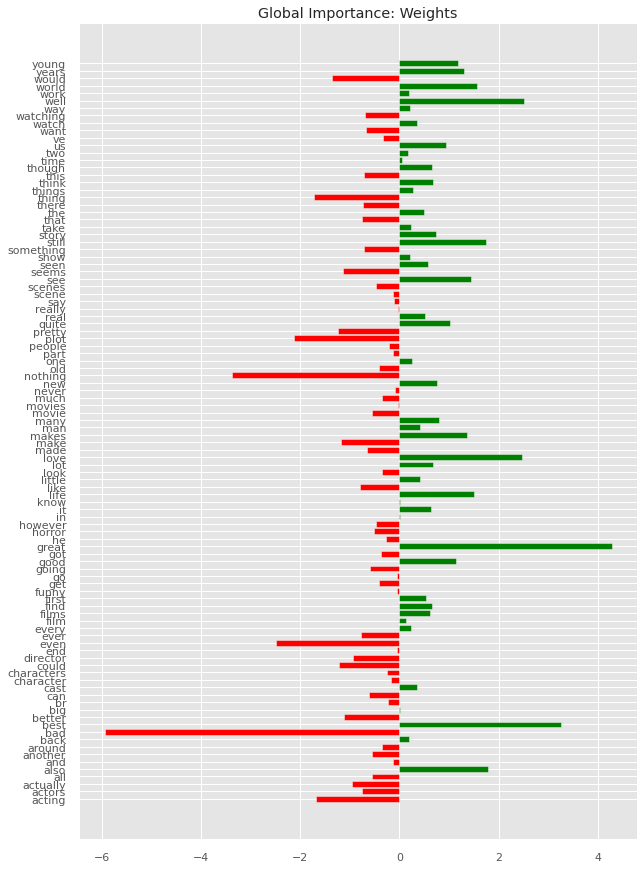

<Figure size 576x576 with 0 Axes>

In [22]:
myEM.experiments[0].showLimeGlobalImportance()

In [23]:
myEM.experiments[0].showLimeLocalImportance()

predicted [1]
actual 0


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


# SHAP

SHAP values not calculated. Generating now
Calculating shap_values for XGB depth:5 est:100


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


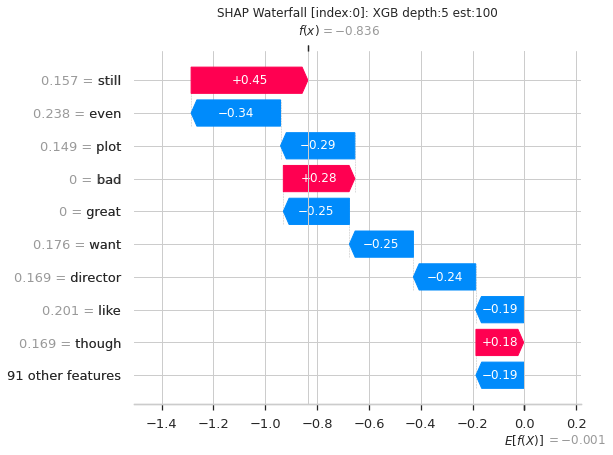

<Figure size 576x576 with 0 Axes>

In [24]:
myEM.show_shap_waterfall(model_index=0,
                         value_index=0)

SHAP values not calculated. Generating now
Calculating shap_values for XGB depth:2 est:20


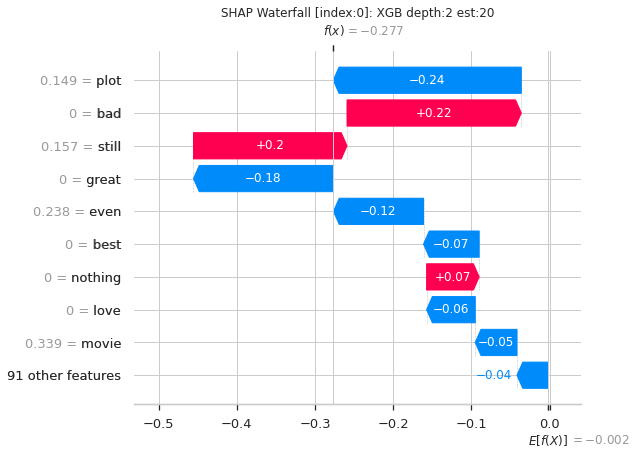

<Figure size 576x576 with 0 Axes>

In [25]:
myEM.show_shap_waterfall(model_index=2,
                         value_index=0)

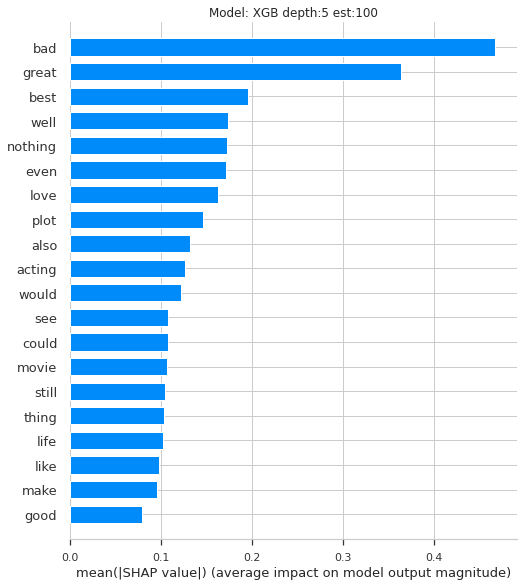

<Figure size 576x576 with 0 Axes>

In [26]:
myEM.show_shap_summary(model_index=0)

# Persistence - Experiment Manager

In [27]:
filename_EM = f'{PROJECT_DIR}/testExperimentManager.pk.gz'
myEM.save(filename_EM)

Saving file as /home/magni/ML_Root/project_root/magritte/demo/testExperimentManager.pk.gz


In [28]:
recoveredEM = ExperimentManager.load(filename_EM)

In [29]:
recoveredEM.display()

DataPackage summary
Attributes:
---> uniqueColumn: uuid
---> dataColumn: review
---> targetColumn: sentiment
Data:
---> isOrigDataLoaded: True
---> isWorkingDataLoaded: True
---> isCleanDataLoaded: True
---> isTrainDataLoaded: True
---> isTestDataLoaded: True

Original Data:
---> original data shape: (50000, 3)
Cleaned Data:
---> ---> clean data shape: (50000, 3)
Working Data:
---> working data shape: (50000, 102)

Process:
---> isProcessed: True
---> isCleaned: True
---> isStopWorded: True
---> isBalanced: True
---> isEncoded: True
---> isTrainTestSplit: True

DataExperiment summary:
---> projectName: Magritte
---> experimentName: XGB depth:5 est:100
---> experimentMethod: supervised
---> isDataPackageLoaded: True
---> isProcessed: True
---> isModelLoaded: True
---> isModelPredicted: True
---> isLearningCurveCreated: True
---> isUntrainedModelLoaded: True
XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
  

# Scratchpad